# Stellar Lifecycles and Nucleosynthesis

## Related Material:
- This lab uses [this assignment prompt](https://github.com/ahinkel/AstronomyTeachingMaterials/blob/main/Labs/StellarLifeCycleSimulation/Lab_StarFormationAndDeath.pdf).
- This lab is part of a series of open-source astronomy and programming exercises intended for introductory college students.  You can learn more about this course [here](https://github.com/ahinkel/AstronomyTeachingMaterials/tree/main).

## Background:
The Milky Way is home to a few hundred billion stars which, at one point or another, formed from the collapse of massive clouds of Hydrogen (and a smattering of other things).  Although a star may live for billions of years, it will eventually run out of its nuclear fuel and – depending on how massive the star is – will end its life in a supernova or will become a white dwarf after it sheds much of its mass into a planetary nebula.  Although the topic of stellar death may elicit sadness, these supernovas and planetary nebulas contribute to something rather beautiful:  new stars!

Yes, supernovae remnants are themselves quite beautiful, but the explosion itself sends shock waves through the Milky Way’s Hydrogen gas, compressing it into denser regions that will eventually gravitationally collapse due to their newfound density, so that new stars can form.  The end of one star may be the beginning of another!  The supernova also creates and distributes heavier elements which then enrich the next generation of stars.  Planetary nebulae also enrich the surrounding gas clouds with elements like Oxygen, Carbon, etc.  The entire process is rather poetic, with each star contributing a verse in the Galaxy’s roughly twelve-billion-year record.  

While supernovae and planetary nebulae are not the only force behind the complex cycle of stellar birth and death, they play an important role.  The goal for today’s lab is to explore a program that simulates this complex story in a rather rudimentary way, in order to better visualize the process.  Just know that there are plenty of other fantastically complicated factors in the Milky Way’s story – we will cover only some of them later in this class.  If you’d like to learn more of the story, you may want to become a physics major or astronomy minor!

A summary of the process is below:
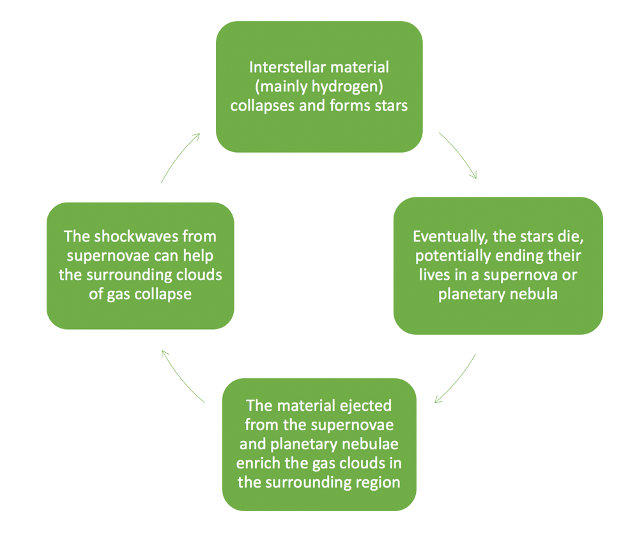

In [1]:
# python 3
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


# Enitre simulation occurs in this volume:

XMIN = 0
XMAX = 100
YMIN = 0
YMAX = 100
ZMIN = 0
ZMAX = 100


#Simulation starts with this many gas particles:

numParticles = 20000

In [2]:
def createBackgroundDist(numParticles2Make):
    """
    This function creates a uniform distribution of gas particles with:
    XMIN < x < XMAX
    YMIN < y < YMAX
    ZMIN < z < ZMAX
    and returns the particle locations in a Data Frame object
    """
    df = pd.DataFrame()
    x = []
    y = []
    z = []
    for i in range(0, numParticles2Make):
        x.append(np.random.uniform(XMIN, XMAX))
        y.append(np.random.uniform(YMIN, YMAX))
        z.append(np.random.uniform(ZMIN, ZMAX))
    df['x'] = x
    df['y'] = y
    df['z'] = z
    return df

In [3]:
def goBoom(xc, yc, zc, rr, df):
    """
    This function crudely simulates a supernova that pushes gas outward away from it.
    
    It creates a void centered on (xc,yc,zc)
    by pushing stars inside a sphere of radius rr radially outward.
    
    It returns a Data Frame object with the new coordinates of the gas particles.
    """
    movedX = []
    movedY = []
    movedZ = []
    #push stars from void region:
    for i in range(0, len(df.x)):
        #Transform coordinates to those centered on (xc,yc,zc)
        newX = df.x.iloc[i] - xc
        newY = df.y.iloc[i] - yc
        newZ = df.z.iloc[i] - zc
        #obtain unit vector pointing from center to star (i.e. radially outward from (xc,yc,zc)):
        #First need to compute r, theta, phi:
        newR = np.sqrt(newX*newX + newY*newY + newZ*newZ)
        newTheta = np.arcsin(newZ / newR)
        newPhi = np.arctan2(newY, newX)
        nx = np.cos(newTheta)*np.cos(newPhi)
        ny = np.cos(newTheta)*np.sin(newPhi)
        nz = np.sin(newTheta)
        #not every single particle will be blown outward, so let's add some randomness:
        randNum = np.random.uniform()
        if ((newR < rr) and (randNum > 0.2)):
            #push the star!
            pushFactor = rr*(1 - newR/rr)*(1 + np.random.uniform(-0.1, 0.1))
            movedX.append(newX + pushFactor*nx)
            movedY.append(newY + pushFactor*ny)
            movedZ.append(newZ + pushFactor*nz)
        else:
            movedX.append(newX)
            movedY.append(newY)
            movedZ.append(newZ)
        #transform back to standard CoordSys:
        movedX[i] = movedX[i] + xc
        movedY[i] = movedY[i] + yc
        movedZ[i] = movedZ[i] + zc
    dfNew = pd.DataFrame()
    dfNew['x'] = movedX
    dfNew['y'] = movedY
    dfNew['z'] = movedZ
    return dfNew
    

In [4]:
def makePlanetaryNebula(xc, yc, zc, df):
    """
    This function crudely simulates a planetary nebula 
    that "puffs" out some material.
    
    It is centered on (xc,yc,zc)
    and releases 2000 new particles into the simulation.
    
    It returns a Data Frame object with the coordinates of 
    all gas particles -- both the old data and the new gas particles
    from the planetary nebula.
    """
    numParticlesPN = 2000
    df_2add = pd.DataFrame()
    xtmp = []
    ytmp = []
    ztmp = []
    anisotropyFactor1 = (1 + np.sin(np.random.uniform(-np.pi/30, np.pi/30)))
    anisotropyFactor2 = (1 + np.sin(np.random.uniform(-np.pi/30, np.pi/30)))
    anisotropyFactor3 = (1 + np.sin(np.random.uniform(-np.pi/30, np.pi/30)))
    #creates 3 shell like structures
    for i in range(0, numParticlesPN):
        shell1r = np.random.uniform(10,20)
        shell2r = np.random.uniform(22,24)
        shell3r = np.random.uniform(26,39)
        xx = xc
        yy = yc
        zz = zc
        randomShell = np.random.uniform(0, 1)
        randomTheta = np.random.uniform(-np.pi/2, np.pi/2)
        randomPhi = np.random.uniform(0, 2*np.pi)
        nx = np.cos(randomTheta)*np.cos(randomPhi)
        ny = np.cos(randomTheta)*np.sin(randomPhi)
        nz = np.sin(randomTheta)
        rotationAngleAlpha = np.random.uniform(0, 2*np.pi)
        rotationAngleBeta = np.random.uniform(0, 2*np.pi)
        rotationAngleGamma = np.random.uniform(0, 2*np.pi)
        #Row-Column
        R11 = np.cos(rotationAngleBeta)*np.cos(rotationAngleGamma)
        R12 = np.sin(rotationAngleAlpha)*np.sin(rotationAngleBeta)*np.cos(rotationAngleGamma) - np.cos(rotationAngleAlpha)*np.sin(rotationAngleGamma)
        R13 = np.cos(rotationAngleAlpha)*np.sin(rotationAngleBeta)*np.cos(rotationAngleGamma) + np.sin(rotationAngleAlpha)*np.sin(rotationAngleGamma)
        R21 = np.cos(rotationAngleBeta)*np.sin(rotationAngleGamma)
        R22 = np.sin(rotationAngleAlpha)*np.sin(rotationAngleBeta)*np.sin(rotationAngleGamma) + np.cos(rotationAngleAlpha)*np.cos(rotationAngleGamma)
        R23 = np.cos(rotationAngleAlpha)*np.sin(rotationAngleBeta)*np.sin(rotationAngleGamma) - np.sin(rotationAngleAlpha)*np.cos(rotationAngleGamma)
        R31 = -np.sin(rotationAngleBeta)
        R32 = np.sin(rotationAngleAlpha)*np.cos(rotationAngleBeta)
        R33 = np.cos(rotationAngleAlpha)*np.cos(rotationAngleBeta)
        nxnew = R11*nx + R12*ny + R13*nz
        nynew = R21*nx + R22*ny + R23*nz
        nznew = R31*nx + R32*ny + R33*nz
        if randomShell <= 0.11:
            xx = xx + (shell1r * anisotropyFactor2)*nxnew
            yy = yy + (shell1r * anisotropyFactor3)*nynew
            zz = zz + (shell1r * anisotropyFactor1)*nznew
        elif randomShell <= 0.45:
            xx = xx + (shell2r * anisotropyFactor3)*nxnew
            yy = yy + (shell2r * anisotropyFactor1)*nynew
            zz = zz + (shell2r * anisotropyFactor2)*nznew
        else:
            xx = xx + (shell3r * anisotropyFactor1)*nxnew
            yy = yy + (shell3r * anisotropyFactor2)*nynew
            zz = zz + (shell3r * anisotropyFactor3)*nznew
        xtmp.append(xx)
        ytmp.append(yy)
        ztmp.append(zz)
    df_2add['x'] = xtmp
    df_2add['y'] = ytmp
    df_2add['z'] = ztmp
    df_out = pd.concat([df, df_2add])
    return df_out

In [5]:
def makePlots(dataInput):
    """
    This function takes a Data Frame object and creates 4 plots:
    - A 3D plot
    - An X-Y plot
    - An X-Z plot
    - An Y-Z plot
    """
    ax = plt.axes(projection='3d')
    ax.plot3D(dataInput.x, dataInput.y, dataInput.z, '.', ms=1)
    plt.show()
    plt.hist2d(dataInput.x, dataInput.y, bins=200)
    plt.xlim([-10,110])
    plt.ylim([-10,110])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.gca().set_aspect('equal')
    plt.show()
    plt.hist2d(dataInput.x, dataInput.z, bins=200)
    plt.xlim([-10,110])
    plt.ylim([-10,110])
    plt.xlabel('x')
    plt.ylabel('z')
    plt.gca().set_aspect('equal')
    plt.show()
    plt.hist2d(dataInput.y, dataInput.z, bins=200)
    plt.xlim([-10,110])
    plt.ylim([-10,110])
    plt.xlabel('y')
    plt.ylabel('z')
    plt.gca().set_aspect('equal')
    plt.show()
    

# Simulation 1:
### Generate a uniform distribution of gas particles.

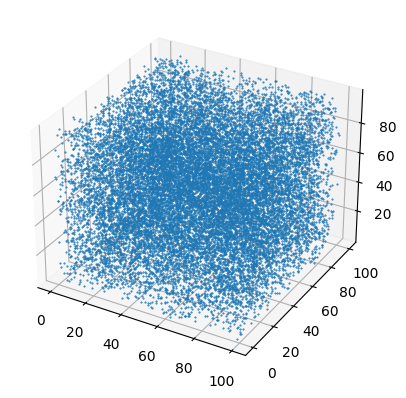

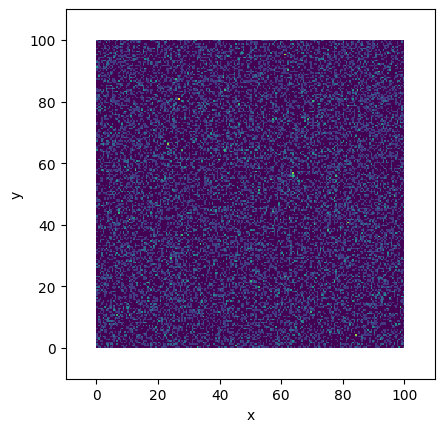

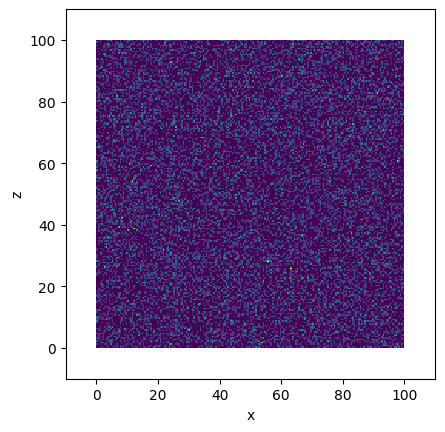

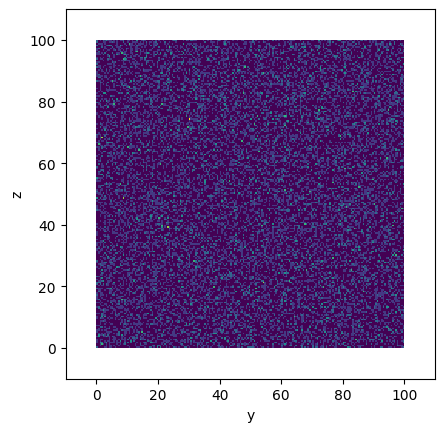

In [6]:
data = createBackgroundDist(numParticles) #create/start the simulation.

makePlots(data) #show the initial distribution of gas particles.

# Simulation 2:
### Distrub the uniform distribution of gas particles with a single supernova.

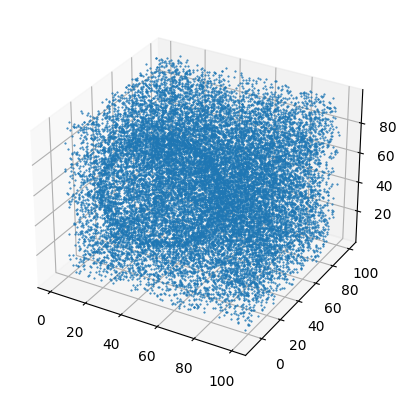

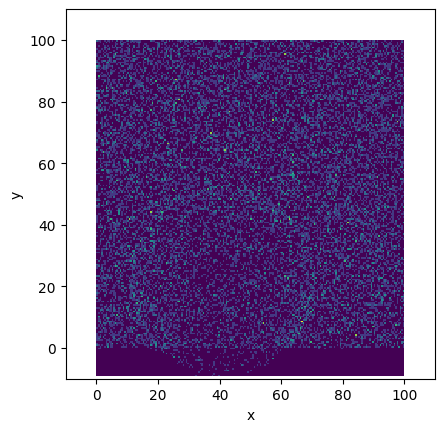

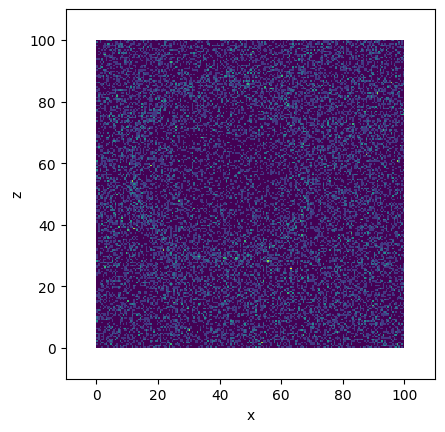

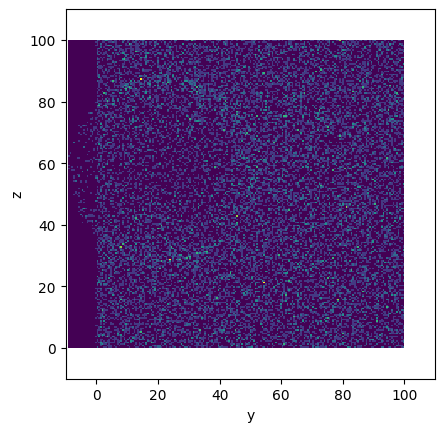

In [7]:
# Now let's create a supernova and see how the data changes:
# We'll center the supernova on the coordinates (x,y,z) = (41, 22, 58)
# and it'll have a radius of 30
xcc = 41
ycc = 22
zcc = 58
rcc = 30
# This function creates the supernova, pushing gas particles :
data = goBoom(xcc, ycc, zcc, rcc, data)

# Now plot the data again:
makePlots(data)

# Simulation 3:
### Add in a planetary nebula to your simulation.

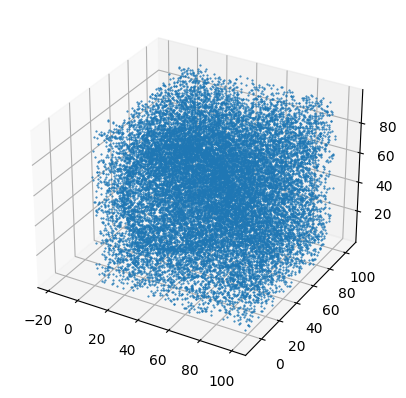

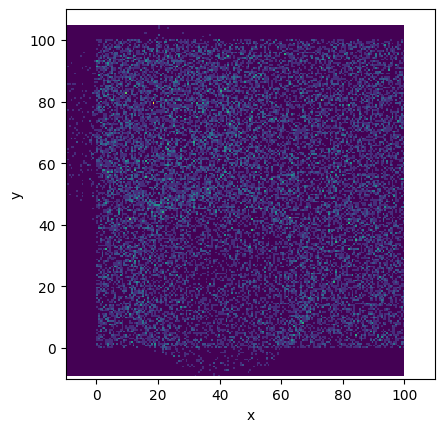

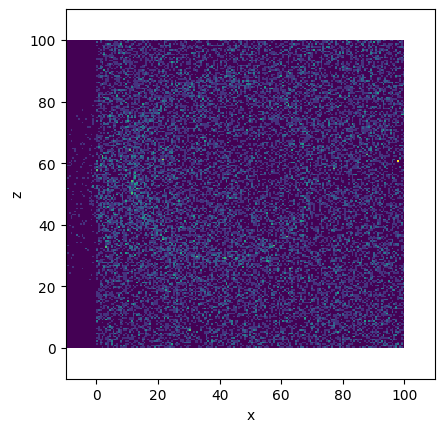

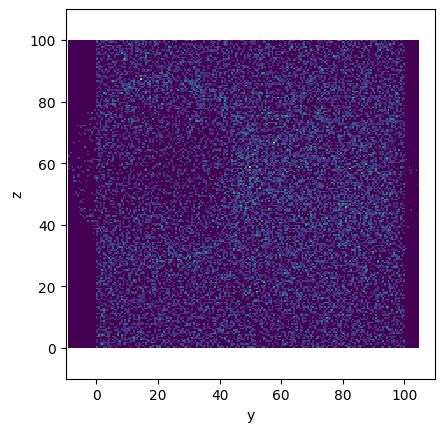

In [8]:
# Similarly, let's add in a Planetary Nebula into our data:
data = makePlanetaryNebula(22, 70, 51, data)

#Plot the data again:
makePlots(data)

# Simulation 4:
### Let's get rid of most of the background particles so we can see a few planetary nebulae more clearly.

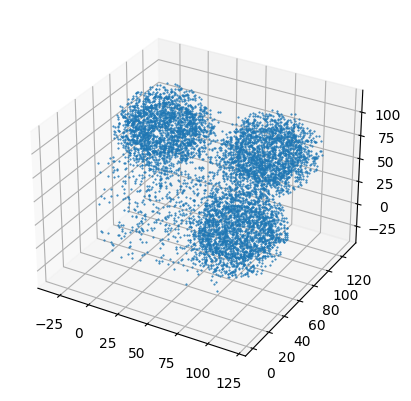

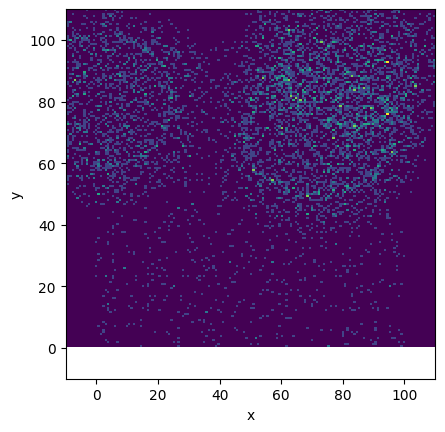

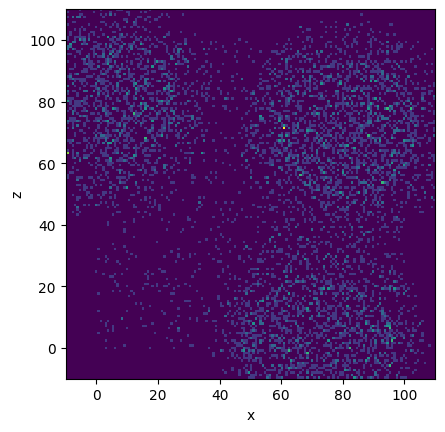

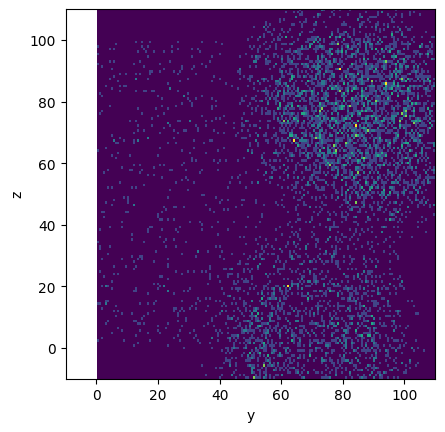

In [9]:
data = createBackgroundDist(1000) #create/start the simulation.
data = makePlanetaryNebula(72,70,1,data)
data = makePlanetaryNebula(2,80,81,data)
data = makePlanetaryNebula(82,94,71,data)
makePlots(data) #show the initial distribution of gas particles.

# Simulation 5:
### Generate a uniform distribution of gas particles and examine the effects of multiple supernovae and planetary nebulae

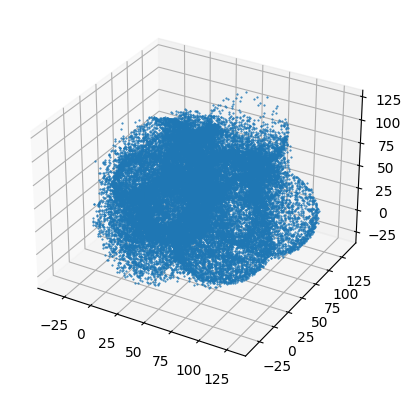

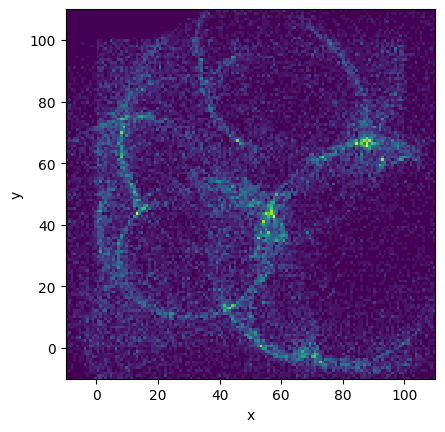

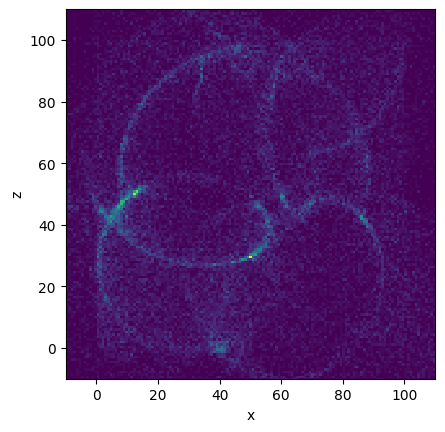

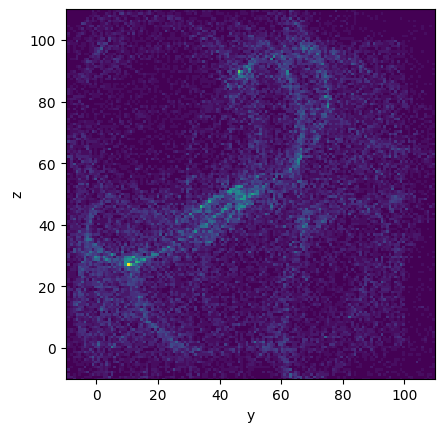

In [10]:
data = createBackgroundDist(numParticles) #create/start the simulation.

#create Planetary nebulae
numNebulae = 10
for i in range(0, numNebulae):
    xcc = np.random.uniform(XMIN, XMAX)
    ycc = np.random.uniform(YMIN, YMAX)
    zcc = np.random.uniform(ZMIN, ZMAX)
    data = makePlanetaryNebula(xcc, ycc, zcc, data)

#create Supernovae
numSNs = 25
for i in range(0, numSNs):
    xcc = np.random.uniform(XMIN, XMAX)
    ycc = np.random.uniform(YMIN, YMAX)
    zcc = np.random.uniform(ZMIN, ZMAX)
    rcc = np.random.uniform(7,42)
    data = goBoom(xcc, ycc, zcc, rcc, data)

makePlots(data)

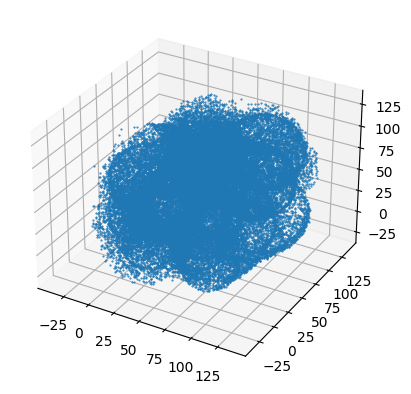

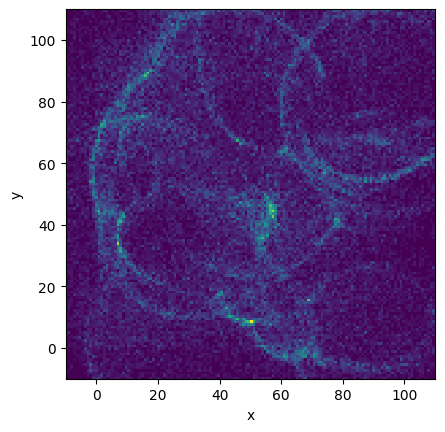

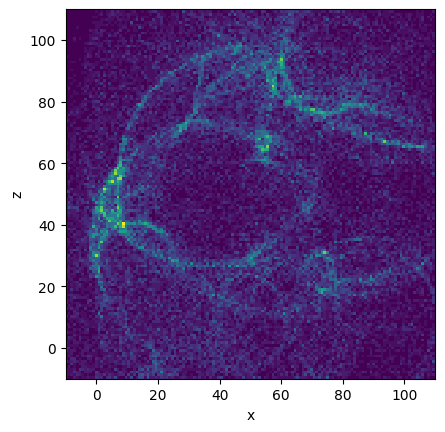

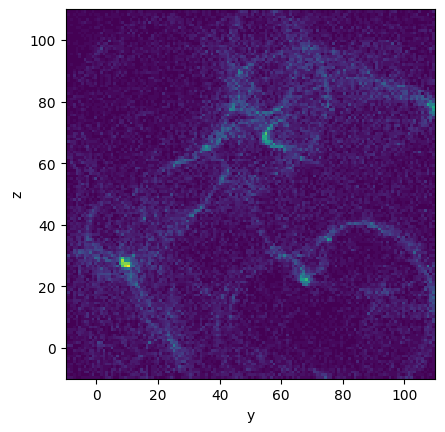

In [11]:
#create more Planetary nebulae
numNebulae = 10
for i in range(0, numNebulae):
    xcc = np.random.uniform(XMIN, XMAX)
    ycc = np.random.uniform(YMIN, YMAX)
    zcc = np.random.uniform(ZMIN, ZMAX)
    data = makePlanetaryNebula(xcc, ycc, zcc, data)

#create more Supernovae
numSNs = 25
for i in range(0, numSNs):
    xcc = np.random.uniform(XMIN, XMAX)
    ycc = np.random.uniform(YMIN, YMAX)
    zcc = np.random.uniform(ZMIN, ZMAX)
    rcc = np.random.uniform(7,42)
    data = goBoom(xcc, ycc, zcc, rcc, data)

makePlots(data)

# Simulation 6:

### Create your own!

In [12]:
#[Your code here!]